Question: When are p-values right skewed?

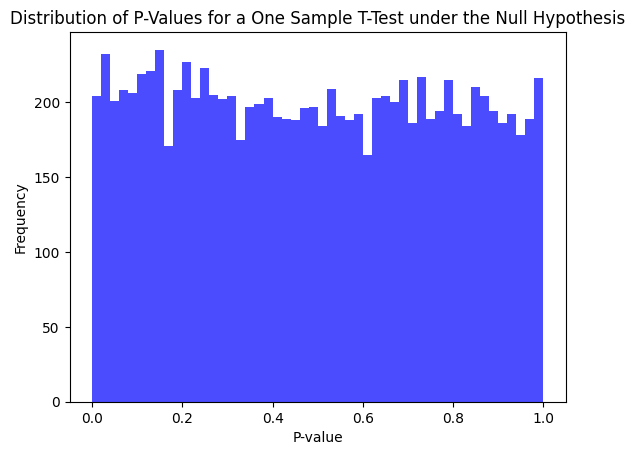

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Parameters
num_samples = 10000
sample_size = 30
population_mean = 0  # under the null hypothesis

# Simulate data and collect p-values
p_values = []
for _ in range(num_samples):
    sample = np.random.normal(population_mean, 1, sample_size)
    t_stat, p_value = stats.ttest_1samp(sample, population_mean)
    p_values.append(p_value)

# Plot the distribution of p-values
plt.hist(p_values, bins=50, color='blue', alpha=0.7)
plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.title('Distribution of P-Values for a One Sample T-Test under the Null Hypothesis')
plt.show()


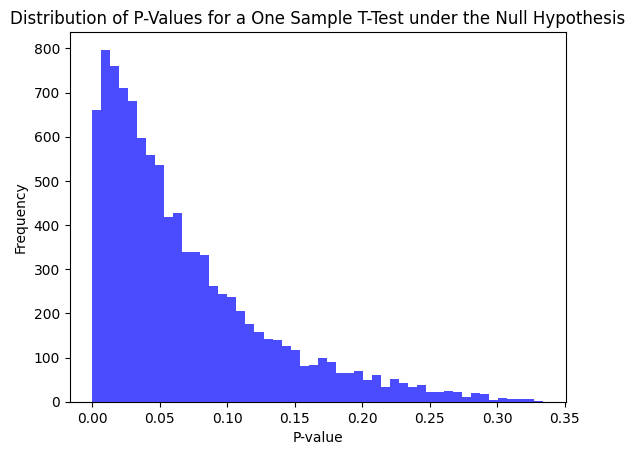

In [12]:
# Simulate data and collect p-values
p_values = []
for _ in range(num_samples):
    sample = np.random.lognormal(0, 1, 5)
    t_stat, p_value = stats.ttest_1samp(sample, 0)
    p_values.append(p_value)

# Plot the distribution of p-values
plt.hist(p_values, bins=50, color='blue', alpha=0.7)
plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.title('Distribution of P-Values for a One Sample T-Test under the Null Hypothesis')
plt.show()

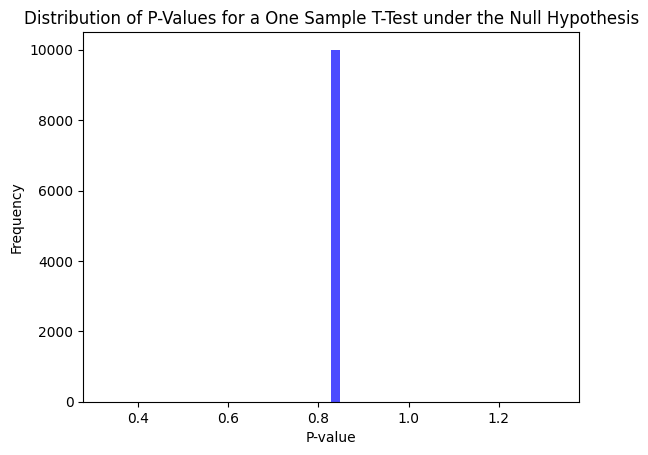

In [17]:
# Simulate data and collect p-values
p_values = []
for _ in range(num_samples):
    # Parameters for the AR(1) process
    phi = 0.5  # Autoregression coefficient
    noise_std = 1  # Standard deviation of the noise
    num_points = 30  # Number of points in the time series

    # Initialize the time series array
    time_series = np.zeros(num_points)
    time_series[0] = np.random.normal(0, noise_std)  # First value of the series

    # Generate the time series
    for i in range(1, num_points):
        time_series[i] = phi * time_series[i - 1] + np.random.normal(0, noise_std)

    t_stat, p_value = stats.ttest_1samp(time_series, 0)
    p_values.append(p_value)

# Plot the distribution of p-values
plt.hist(p_values, bins=50, color='blue', alpha=0.7)
plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.title('Distribution of P-Values for a One Sample T-Test under the Null Hypothesis')
plt.show()